<a href="https://colab.research.google.com/github/mehrotrasan16/Keras-Deep-Learning/blob/02-FashionMNISTAutoKeras-Classification/A2_Q1_FashionMNISTAuto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import models,layers

train_data, test_data,  = tf.keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
train_images, train_labels = train_data
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [ ]:
test_images, test_labels = test_data
test_images.shape, test_labels.size

((10000, 28, 28), 10000)

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images,test_images  = train_images / 255.0, test_images / 255.0

In [ ]:
train_images.shape[1:], test_images.shape[1:]

((28, 28), (28, 28))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:

classes =(np.unique(train_labels))
classes

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
classnames = np.array(['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt', 'sneaker', 'bag','ankle-boot'])
classnames

array(['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal',
       'Shirt', 'sneaker', 'bag', 'ankle-boot'], dtype='<U10')

In [ ]:
classes = classes.reshape((-1,1))
classnames = classnames.reshape((-1,1))

In [ ]:
arrayclass = np.hstack((classes,classnames))

In [ ]:
ClassDistribution = pd.DataFrame(arrayclass,columns=['Class','Class-name'])
ClassDistribution

,Class,Class-name
0,0,T-shirt
1,1,Trouser
2,2,Pullover
3,3,Dress
4,4,Coat
5,5,Sandal
6,6,Shirt
7,7,sneaker
8,8,bag
9,9,ankle-boot


In [ ]:
freqs = [list(train_labels).count(x) for x in classes]

In [ ]:
ClassDistribution['Train Freq'] = freqs

In [ ]:
ClassDistribution

,Class,Class-name,Train Freq
0,0,T-shirt,6000
1,1,Trouser,6000
2,2,Pullover,6000
3,3,Dress,6000
4,4,Coat,6000
5,5,Sandal,6000
6,6,Shirt,6000
7,7,sneaker,6000
8,8,bag,6000
9,9,ankle-boot,6000


In [ ]:
test_freqs = [list(test_labels).count(x) for x in classes]

In [ ]:
ClassDistribution['Test Freq'] = freqs

In [ ]:
ClassDistribution

,Class,Class-name,Train Freq,Test Freq
0,0,T-shirt,6000,6000
1,1,Trouser,6000,6000
2,2,Pullover,6000,6000
3,3,Dress,6000,6000
4,4,Coat,6000,6000
5,5,Sandal,6000,6000
6,6,Shirt,6000,6000
7,7,sneaker,6000,6000
8,8,bag,6000,6000
9,9,ankle-boot,6000,6000


In [ ]:
train_images[0].shape

(28, 28)

In [ ]:
#INSERT YOUR MODEL CODE HERE
#YOU CAN ALSO CHANGE THE CODE BELOW TO COMPILE AND RUN THE MODEL

model = models.Sequential()
model.add(keras.layers.Reshape(input_shape=(28*28,), target_shape=(28, 28, 1))),
model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.BatchNormalization(center=True, scale=False))
model.add(layers.Dropout(0.50))
model.add(layers.Dense(10))


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20, 
                    validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.3420 - accuracy: 0.8742 - val_loss: 0.3376 - val_accuracy: 0.8797
Epoch 2/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3328 - accuracy: 0.8788 - val_loss: 0.3254 - val_accuracy: 0.8852
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3261 - accuracy: 0.8810 - val_loss: 0.3273 - val_accuracy: 0.8825
Epoch 4/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3209 - accuracy: 0.8807 - val_loss: 0.3234 - val_accuracy: 0.8854
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3162 - accuracy: 0.8852 - val_loss: 0.3214 - val_accuracy: 0.8830
Epoch 6/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3128 - accuracy: 0.8848 - val_loss: 0.3204 - val_accuracy: 0.8844
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3055 - accuracy: 0.8884 - val_loss: 0.3121 - val_accuracy:

313/313 - 1s - loss: 0.2855 - accuracy: 0.9001


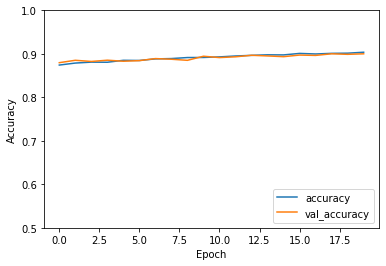

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

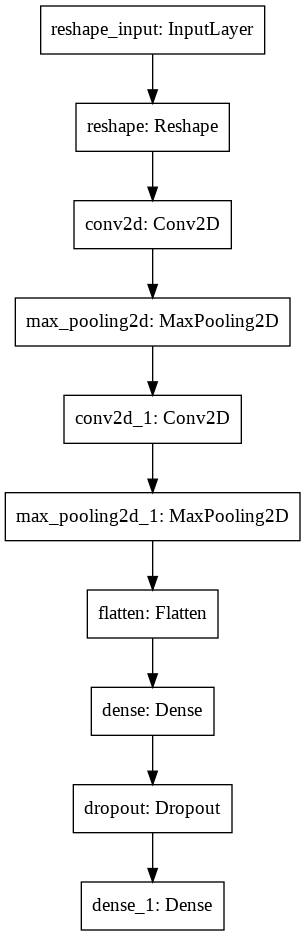

In [ ]:
keras.utils.plot_model(model)

In [ ]:
!pip3 install git+https://github.com/keras-team/keras-tuner.git@1.0.2rc1
!pip3 install autokeras

  Cloning https://github.com/keras-team/keras-tuner.git (to revision 1.0.2rc1) to /tmp/pip-req-build-zxrjjhva
  Running command git clone -q https://github.com/keras-team/keras-tuner.git /tmp/pip-req-build-zxrjjhva
  Running command git checkout -q 0fb69434a132093518e0e53d40020145ae192629
  Created wheel for keras-tuner: filename=keras_tuner-1.0.2rc1-cp36-none-any.whl size=85424 sha256=45dc06376a4e209490a4efcb62005e73b2c677f97b0b87c3f7f63549c1da75a8
  Stored in directory: /tmp/pip-ephem-wheel-cache-wj7zrqdi/wheels/af/c9/7c/6ea01f9753a5dd1484136b4cb7b33a0a7fba253e5c74ade5af
  Created wheel for terminaltables: filename=terminaltables-3.1.0-cp36-none-any.whl size=15356 sha256=12d17f9561a015e9b8f06e738550ec3604522d52f7082ccb2dd7e28ba810b9b5
  Stored in directory: /root/.cache/pip/wheels/30/6b/50/6c75775b681fb36cdfac7f19799888ef9d8813aff9e379663e
Successfully built keras-tuner terminaltables
     |████████████████████████████████| 122kB 3.3MB/s 


In [26]:
import autokeras as ak

clf = ak.ImageClassifier(num_classes=10,
                         multi_label=False,
                         loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                         max_trials=5,
                         project_name='FashionMNISTAuto4')

checkpoint_filepath='weights.{epoch:02d}-{val_loss:.2f}.hdf5'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

history = clf.fit(x=train_images,
        y=train_labels,
        epochs=10,
        callbacks=[model_checkpoint_callback],
        validation_data=(test_images,test_labels),
        )




Trial 4 Complete [02h 15m 00s]
val_loss: 0.22351326048374176

Best val_loss So Far: 0.19534330070018768
Total elapsed time: 04h 50m 39s

Search: Running Trial #5

Hyperparameter      |Value     |Best Value So Far   
image_block_1/normalize|True      |True                
image_block_1/augment|True      |True                
image_block_1/block_type|xception  |resnet              
classification_head_1/spatial_reduction_1/reduction_type|global_avg|global_avg          
classification_head_1/dropout|0         |0                   
optimizer           |adam      |adam                
learning_rate       |1e-05     |1e-05               
image_block_1/image_augmentation_1/translation_factor|0.1       |0.1                 
image_block_1/image_augmentation_1/horizontal_flip|True      |True                
image_block_1/image_augmentation_1/vertical_flip|False     |False               
image_block_1/image_augmentation_1/rotation_factor|0.0       |0.0                 
image_block_1/image_augment

In [27]:
results = clf.predict(test_images)

In [28]:
results

array([[9],
       [2],
       [1],
       ...,
       [8],
       [1],
       [5]], dtype=uint8)

In [29]:
clf.evaluate(test_images,test_labels)

313/313 [==============================] - 37s 117ms/step - loss: 0.2225 - accuracy: 0.9372


[0.22252199053764343, 0.9372000098228455]

In [30]:
# Export as a Keras Model.
model = clf.export_model()

print(type(model))  # <class 'tensorflow.python.keras.engine.training.Model'>

<class 'tensorflow.python.keras.engine.functional.Functional'>


In [31]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
normalization (Normalization)   (None, 28, 28, 1)    3           input_1[0][0]                    
__________________________________________________________________________________________________
random_translation (RandomTrans (None, 28, 28, 1)    0           normalization[0][0]              
__________________________________________________________________________________________________
random_flip (RandomFlip)        (None, 28, 28, 1)    0           random_translation[0][0]         
_______________________________________________________________________________________

In [35]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


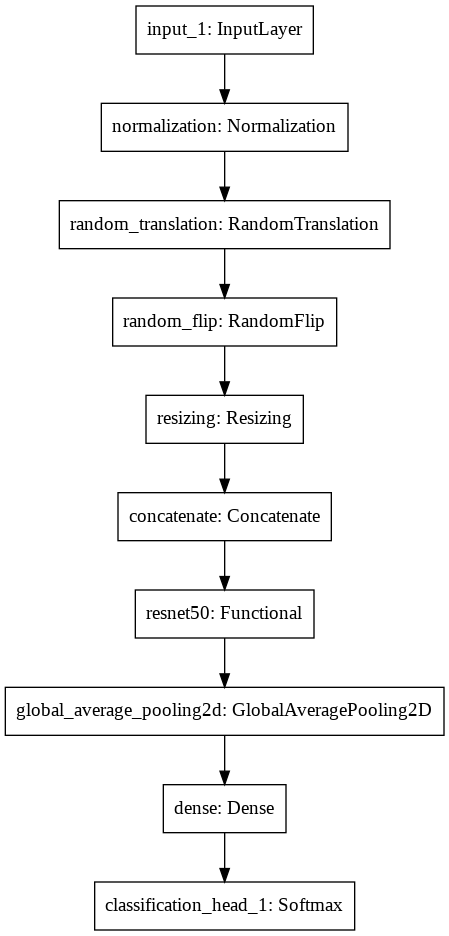

In [32]:
keras.utils.plot_model(model)

In [33]:
model.predict(test_images[:10])

array([[4.2373254e-06, 1.5159634e-07, 3.3326126e-07, 1.3640451e-07,
        4.3851134e-07, 4.1397936e-07, 7.5591930e-07, 2.0924413e-06,
        5.4167177e-08, 9.9999142e-01],
       [1.5850885e-05, 1.9965194e-07, 9.9983490e-01, 6.3349798e-05,
        6.9230577e-05, 3.4959382e-06, 1.2610507e-05, 1.7806761e-07,
        1.6195530e-07, 1.6205163e-08],
       [7.6228298e-07, 9.9998319e-01, 2.6352727e-06, 2.2583832e-07,
        2.0317079e-06, 7.3282661e-07, 5.8296354e-07, 4.5757022e-07,
        4.3958066e-06, 5.0023282e-06],
       [8.9673216e-07, 9.9996805e-01, 2.2047191e-06, 1.2639597e-06,
        2.2905060e-06, 1.6635467e-07, 1.6730308e-05, 1.0906255e-06,
        4.1892354e-06, 3.0384699e-06],
       [2.7425864e-01, 1.2964194e-05, 1.1246335e-03, 2.3765242e-04,
        3.5628714e-04, 5.5324494e-06, 7.2396588e-01, 3.3580138e-06,
        1.7860098e-06, 3.3227159e-05],
       [6.1426476e-06, 9.9988258e-01, 9.6936928e-06, 1.8935640e-06,
        9.3096114e-06, 3.4729364e-06, 1.1787771e-05, 1.08

In [34]:
model.save("AutoKerasFashionMNIST.h5")